Desafio
Alumno: Israel Pavelek

Consigna:

Realizar un pequeño análisis univariado de datos, teniendo en cuenta las características de las observaciones. Generar al menos 3 gráficos asociados.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display_html


In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
display_html(df.head())

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Veamos el tipo de objeto para ver cuales son variables categóricas

In [4]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Se chequea si existen valores nulos.

In [5]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Se chequea si el identificador de cliente (CLIENTNUM) es único

In [6]:
df.CLIENTNUM.nunique()/df.shape[0]

1.0

Podemos eliminar CLIENTNUM porque no hay identificadores repetidos

In [7]:
df.drop(columns='CLIENTNUM', inplace=True)

# Gráficos 
## Categoría de ingresos según el género

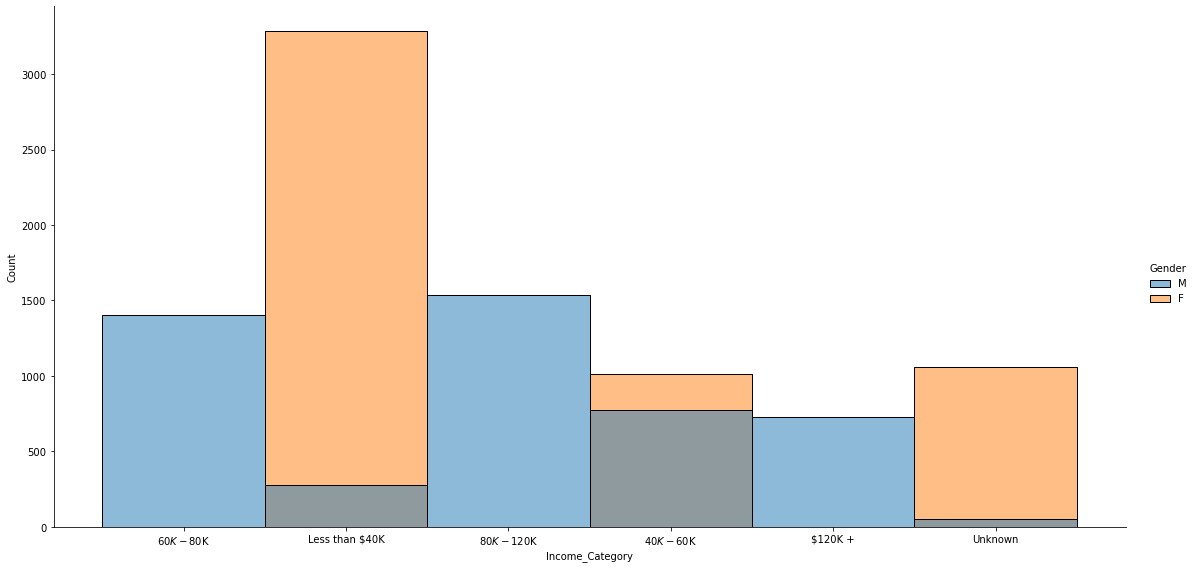

In [8]:
sns.displot(x=df["Income_Category"], 
            hue=df["Gender"],         
            height=8,
            aspect=2)

## Cantidad de personas que cancelan la tarjeta según sus ingresos

In [9]:
df['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

Del total que dejan la tarjeta, veamos como se distribuyen en función de su nivel de eduación

In [10]:
df[df['Attrition_Flag'] == 'Attrited Customer']['Education_Level'].value_counts(normalize=True)

Graduate         0.299324
High School      0.188076
Unknown          0.157345
Uneducated       0.145667
College          0.094653
Doctorate        0.058390
Post-Graduate    0.056546
Name: Education_Level, dtype: float64

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

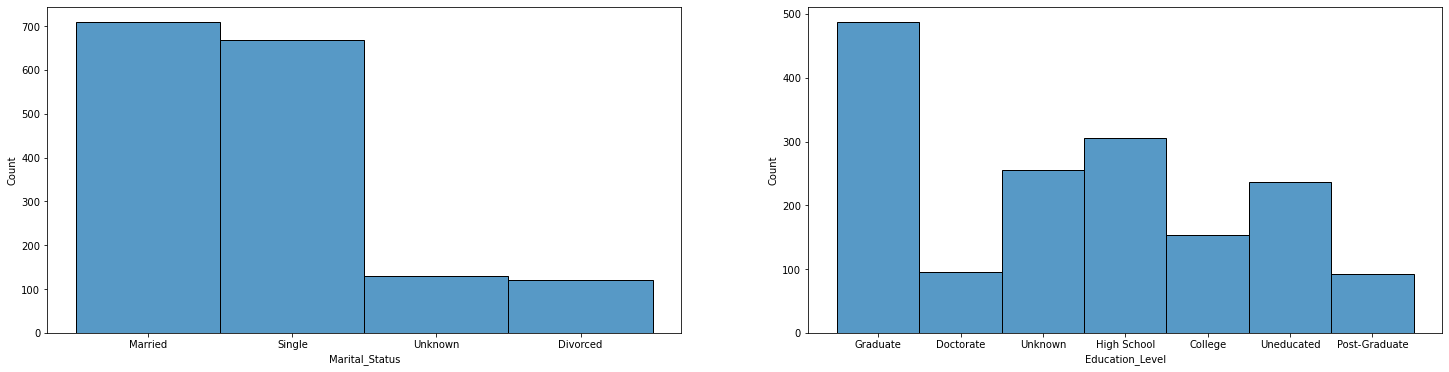

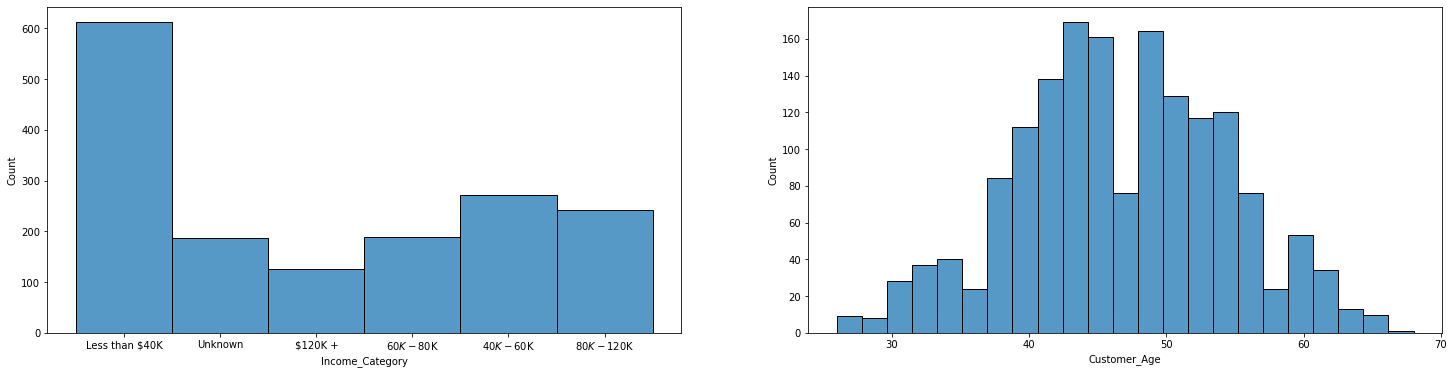

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,6))
sns.histplot(df[df['Attrition_Flag'] == 'Attrited Customer']['Marital_Status'], ax=axes[0])
sns.histplot(df[df['Attrition_Flag'] == 'Attrited Customer']['Education_Level'], ax=axes[1])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,6))
sns.histplot(df[df['Attrition_Flag'] == 'Attrited Customer']['Income_Category'], ax=axes[0])
sns.histplot(df[df['Attrition_Flag'] == 'Attrited Customer']['Customer_Age'], ax=axes[1])

## Cambios en los montos de las transacciones y Cambios en la cantidad de transaccione por tipo de cliente y género

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Count'>

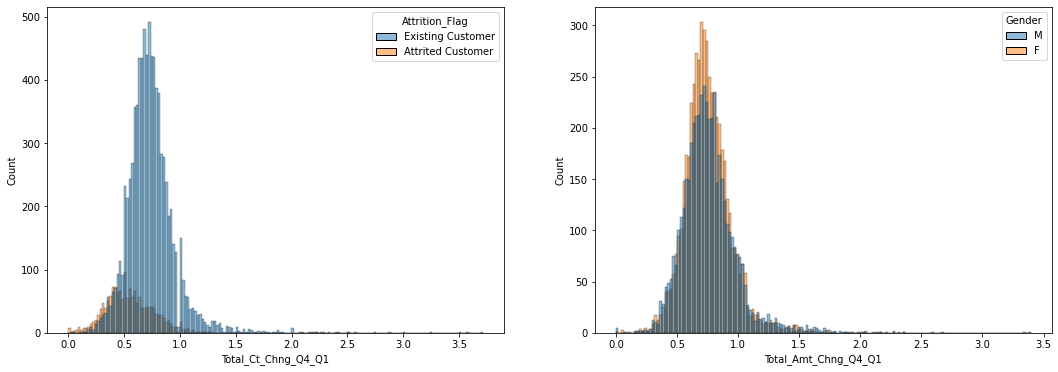

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.histplot(data=df, x='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', ax=axes[0])
sns.histplot(data=df, x='Total_Amt_Chng_Q4_Q1', hue='Gender', ax=axes[1])